In [13]:
#Importing the CIFAR-10 dataset from keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

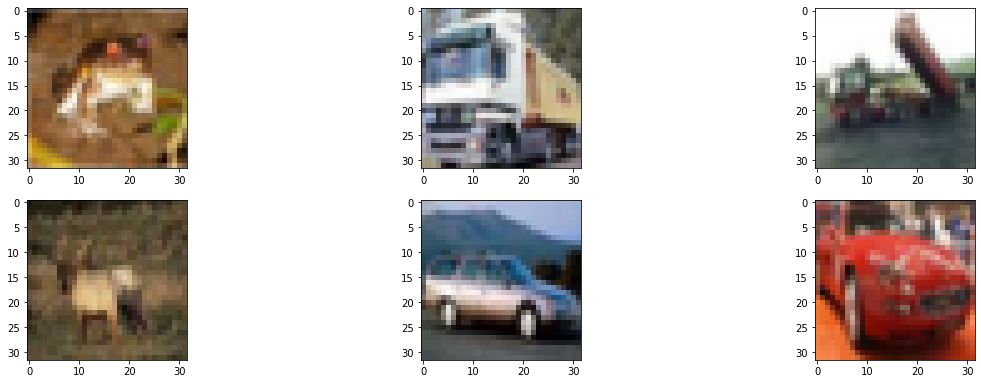

In [31]:
#Displaying first few images in the dataset
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()

In [15]:
#Importing the required layers and modules to create our convolution neural net architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [16]:
#Converting the pixel values of the dataset to float type and then normalizing them
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [17]:
#One-Hot Encoding for the target labels
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [23]:
#CNN Sequential Model
#Consists Dropout and Batch Normalization layers for regularization
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

In [24]:
#Compiling the model
#Adam optimizer
model1.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']) 

In [25]:
#Model Architecture for better understanding
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [26]:
#Training the model
#Trained and Tested with 10 and 25 epochs
#25 epochs gave more accuracy
model1.fit(train_X,train_Y, validation_data=(test_X,test_Y),
    epochs=25,batch_size=64)

Epoch 1/25
782/782 [==============================] - 425s 543ms/step - loss: 2.0297 - accuracy: 0.3487 - val_loss: 1.0750 - val_accuracy: 0.6072
Epoch 2/25
782/782 [==============================] - 425s 544ms/step - loss: 1.1066 - accuracy: 0.6067 - val_loss: 1.0686 - val_accuracy: 0.6353
Epoch 3/25
782/782 [==============================] - 425s 543ms/step - loss: 0.8953 - accuracy: 0.6891 - val_loss: 0.7953 - val_accuracy: 0.7147
Epoch 4/25
782/782 [==============================] - 423s 542ms/step - loss: 0.7959 - accuracy: 0.7237 - val_loss: 0.7948 - val_accuracy: 0.7156
Epoch 5/25
782/782 [==============================] - 424s 542ms/step - loss: 0.7211 - accuracy: 0.7508 - val_loss: 0.6516 - val_accuracy: 0.7749
Epoch 6/25
782/782 [==============================] - 425s 543ms/step - loss: 0.6407 - accuracy: 0.7790 - val_loss: 0.6374 - val_accuracy: 0.7801
Epoch 7/25
782/782 [==============================] - 424s 542ms/step - loss: 0.5961 - accuracy: 0.7959 - val_loss: 0.7118 -

In [27]:
#Accuracy of the model on the test data
acc=model1.evaluate(test_X,test_Y)

313/313 [==============================] - 20s 64ms/step - loss: 0.4879 - accuracy: 0.8496


In [28]:
#Saving the weights of the model
model1.save("model1_cifar_10epoch.h5")

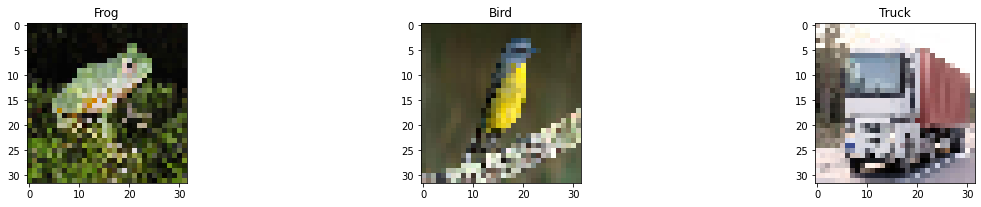

In [38]:
#Making a dictionary to map the output classes and make predictions from the model
results={
   0:'Aeroplane',
   1:'Automobile',
   2:'Bird',
   3:'Cat',
   4:'Deer',
   5:'Dog',
   6:'Frog',
   7:'Horse',
   8:'Ship',
   9:'Truck'
}

import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
pred=[]
image=[]
for i in range(3):
  img = load_img('pic'+str(i)+'.jpg', target_size=(32, 32))
  image.append(img)
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 3 channels
  img = img.reshape(1, 32, 32, 3)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0

  pred.extend(np.argmax(model1.predict(img), axis=-1))

#Plotting results
plt.figure(figsize=(20,10))
for i in range(3):
  plt.subplot(330+1+i)
  plt.imshow(image[i])
  plt.title(results[pred[i]])
plt.show()